In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd
df=pd.read_csv('/content/test.csv')

In [ ]:
df.head()

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845


In [ ]:
#Datetime conversion
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25550 entries, 0 to 25549
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         25550 non-null  datetime64[ns]
 1   store        25550 non-null  int64         
 2   product      25550 non-null  int64         
 3   number_sold  25550 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 798.6 KB


In [ ]:
df=df.sort_values('Date')
df.set_index('Date',inplace=True)

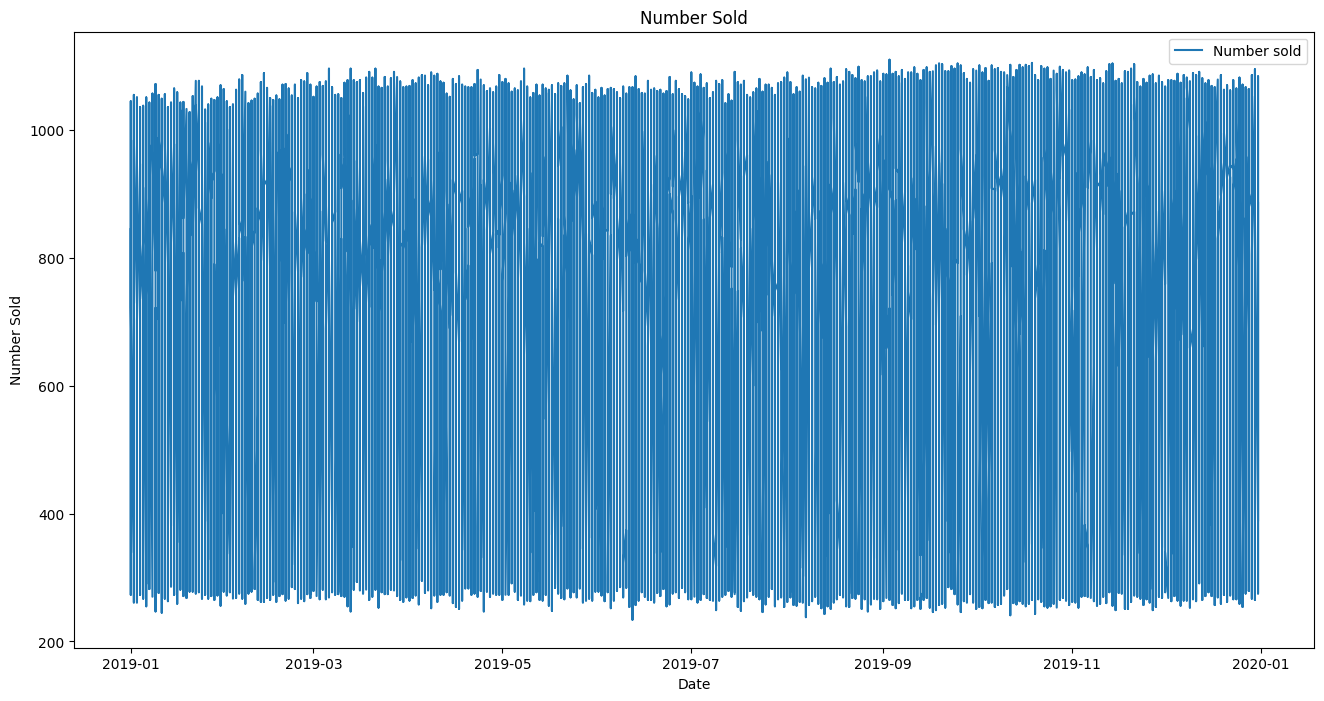

In [ ]:
#visualisation of the original data
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(df['number_sold'],label='Number sold')
plt.title('Number Sold')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.legend()

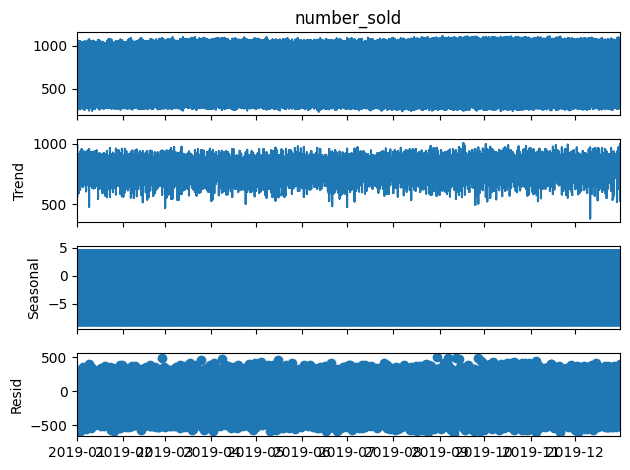

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df['number_sold']
result = seasonal_decompose(ts, model='additive', period=7)
result.plot()
plt.show()


In [ ]:
#ADF test
from statsmodels.tsa.stattools import adfuller
result=adfuller(ts)
result

(np.float64(-30.471203836488385),
 0.0,
 47,
 25502,
 {'1%': np.float64(-3.430606448841072),
  '5%': np.float64(-2.8616533427216595),
  '10%': np.float64(-2.566830328999617)},
 np.float64(345410.4210178626))

In [ ]:
print('ADF Statistics:',result[0])
print('P-Value :',result[1])
print('Lag used :',result[2])
print('Number of observations :',result[3])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistics: -30.471203836488385
P-Value : 0.0
Lag used : 47
Number of observations : 25502
Critical Values:
   1%: -3.430606448841072
   5%: -2.8616533427216595
   10%: -2.566830328999617


In [ ]:
if result[1]<=0.05:
  print('Reject null hypothesis Ho,Stationary')
else:
  print('Accept Null Hypothesis,Stationary')

Reject null hypothesis Ho,Stationary
